In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [36]:
df = pd.read_csv('curated_gene_disease_associations.csv')

In [37]:
df.describe()

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps
count,8.174600e+04,81620.000000,81598.000000,81746.000000,22862.000000,73123.000000,73123.000000,81746.000000,81746.000000
mean,6.214032e+05,0.577307,0.569338,0.345747,0.956704,2006.373179,2010.641194,1.377853,0.982751
std,7.676491e+06,0.136227,0.226062,0.112264,0.142197,7.937566,5.954987,2.594623,14.596577
min,1.000000e+00,0.251000,0.034000,0.010000,0.000000,1916.000000,1952.000000,0.000000,0.000000
25%,2.638000e+03,0.479000,0.414000,0.300000,1.000000,2003.000000,2007.000000,1.000000,0.000000
50%,5.428000e+03,0.572000,0.621000,0.300000,1.000000,2008.000000,2011.000000,1.000000,0.000000
75%,1.028000e+04,0.663000,0.759000,0.320000,1.000000,2012.000000,2015.000000,1.000000,0.000000
max,1.095801e+08,1.000000,0.966000,1.000000,1.000000,2018.000000,2018.000000,124.000000,2343.000000


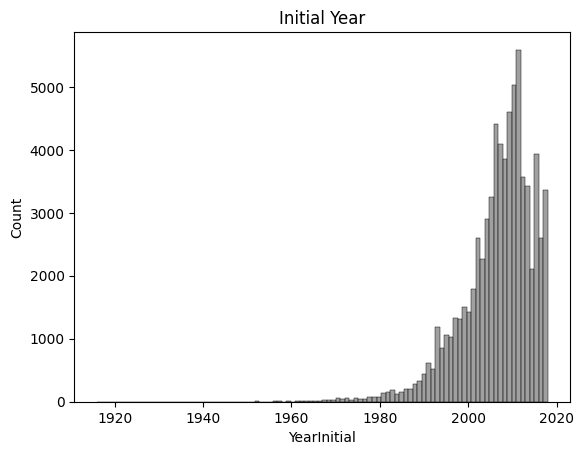

In [38]:
_ = sns.histplot(df.YearInitial, bins=100, color='gray').set_title('Initial Year')

In [39]:
df_year = df.YearInitial
df_year.head()

0    2017.0
1    2015.0
2    1998.0
3    2004.0
4    2004.0
Name: YearInitial, dtype: float64

In [40]:
df_year

0        2017.0
1        2015.0
2        1998.0
3        2004.0
4        2004.0
          ...  
81741       NaN
81742       NaN
81743       NaN
81744       NaN
81745       NaN
Name: YearInitial, Length: 81746, dtype: float64

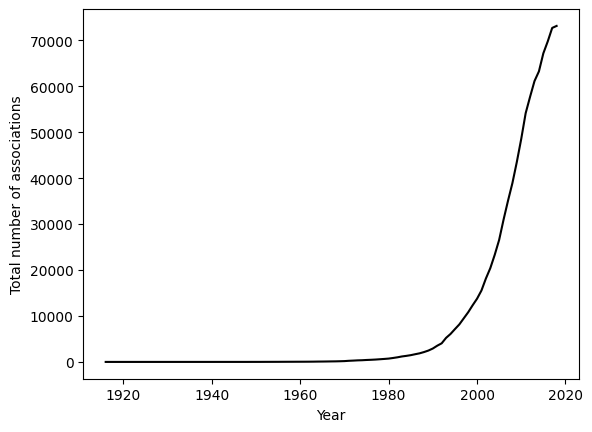

In [41]:
x = sorted(df_year.dropna().unique())
y = np.cumsum(df_year.value_counts().sort_index())

ax = sns.lineplot(x=x, y=y, color='black')
_ = ax.set(ylabel='Total number of associations', xlabel = 'Year')


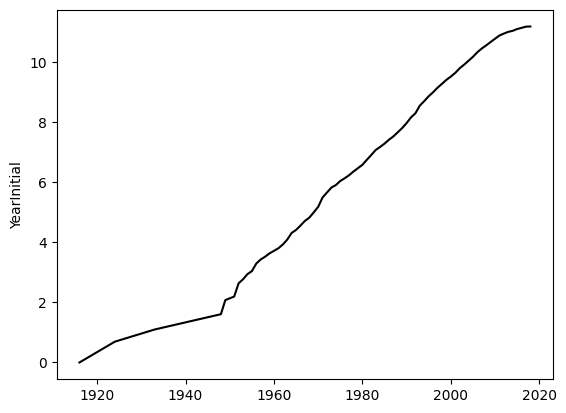

In [42]:
ax = sns.lineplot(x=x, y=np.log(y), color='black')

In [43]:
log_y = np.log(y)/np.log(2)
idx = log_y.index > 1945
log_x = pd.Series(x)

In [44]:
log_y[idx]

1948.0     2.321928
1949.0     3.000000
1951.0     3.169925
1952.0     3.807355
1953.0     4.000000
            ...    
2014.0    15.948390
2015.0    16.035401
2016.0    16.090174
2017.0    16.149390
2018.0    16.158038
Name: YearInitial, Length: 69, dtype: float64

In [45]:
x = np.array(log_x[idx]).reshape(-1,1)
y = log_y[idx]

In [65]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            YearInitial   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              458.3
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                    6.28e-32
Time:                        18:23:50   Log-Likelihood:                         -192.99
No. Observations:                  69   AIC:                                      388.0
Df Residuals:                      68   BIC:                                      390.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0052      0.000     21.407      0.000       0.005       0.006
==============================================================================
Omnibus:                       18.843   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.355
Skew:                          -0.155   Prob(JB):                        0.113
Kurtosis:                       1.809   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

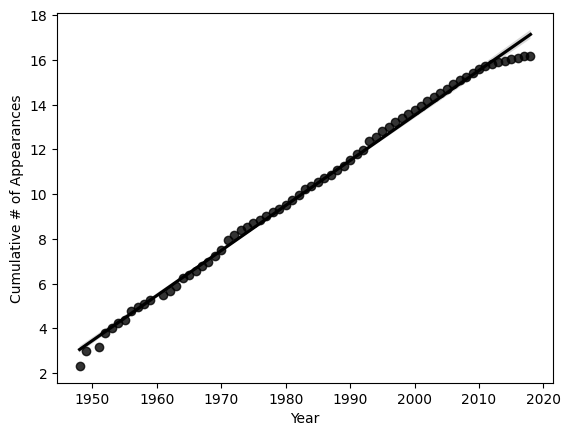

In [51]:
ax = sns.regplot(x=log_x[idx],y=y, color='black')
_ = ax.set(xlabel='Year', ylabel='Cumulative # of Appearances')

In [69]:
reg = LinearRegression().fit(np.array(log_x[idx]).reshape(-1,1), log_y[idx])

In [73]:
a = reg.coef_
doubling_rate = 1/a

print(f'The total number of known associations doubles every {doubling_rate} years!')

The total number of known associations doubles every [4.97210066] years!
